<a href="https://colab.research.google.com/github/ThakdanaiSaelee/Lab_CE888/blob/main/lab2%20-%20bootstrap/bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [11]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [12]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [13]:
data.shape

(14,)

In [14]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def bootstrap_mean(x, sample_size, n_bootstraps):
	# <---INSERT YOUR CODE HERE--->
	member = len(x)
	answer_mean = []
	for i in range(n_bootstraps):
		sample = np.random.choice(x, member)
		answer_mean.append(np.mean(sample))
	answer_mean = np.sort(answer_mean)
	data_mean = np.mean(answer_mean)
	lower = answer_mean[0]
	upper = answer_mean[-1]
	return data_mean, lower, upper


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

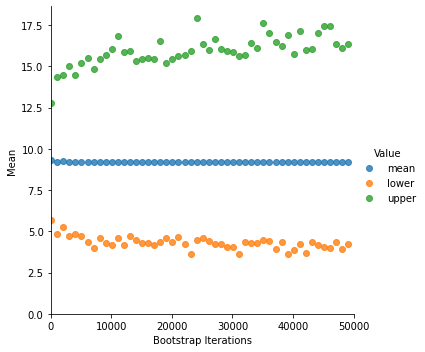

In [15]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)



Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [16]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
	# <---INSERT YOUR CODE HERE--->
	member = len(sample)
	answer_mean = []
	for i in range(n_bootstraps):
		re_sample = np.random.choice(sample, sample_size)
		answer_mean.append(np.mean(re_sample))
	answer_mean = np.sort(answer_mean)
	position = ((100-ci)/2)
	# remove = round(remove)
	# if remove != 0:
	# 	answer_mean = answer_mean[remove+1 : -remove]
	data_mean = np.mean(answer_mean)
	lower = np.percentile(answer_mean, position)
	upper = np.percentile(answer_mean, 100-position)
	return data_mean, lower, upper

def bootstrap_standeviation_ci(sample, sample_size, n_bootstraps, ci):
	# <---INSERT YOUR CODE HERE--->
	member = len(sample)
	answer_std = []
	for i in range(n_bootstraps):
		re_sample = np.random.choice(sample, sample_size)
		answer_std.append(np.std(re_sample))
	answer_std = np.sort(answer_std)
	position = ((100-ci)/2)
	data_std = np.std(answer_std)
	lower = np.percentile(answer_std, position)
	upper = np.percentile(answer_std, 100-position)
	return data_std, lower, upper

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

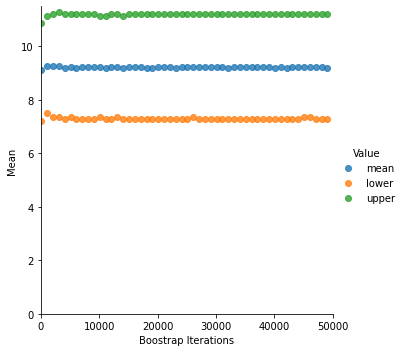

In [17]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


In [ ]:
data_mean, lower, upper = bootstrap_mean_ci(data, data.shape[0], 10000, 95)
print('lower =',lower)
print('upper =',upper)

lower = 6.357142857142857
upper = 12.357142857142858


In [ ]:
data_mean, lower, upper = bootstrap_mean_ci(data, data.shape[0], 10000, 80)
print('lower =',lower)
print('upper =',upper)

lower = 7.285714285714286
upper = 11.214285714285714


In [ ]:
data_std, lower, upper = bootstrap_standeviation_ci(data, data.shape[0], 10000, 85)
print('lower =',lower)
print('upper =',upper)

lower = 3.3079217460673283
upper = 6.9197292621333455


In [ ]:
data_std, lower, upper = bootstrap_standeviation_ci(data, data.shape[0], 10000, 99)
print('lower =',lower)
print('upper =',upper)

lower = 2.191093947804424
upper = 7.802746766929896


# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


In [18]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")


# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# <---INSERT YOUR CODE HERE--->
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
data_current = df[df.columns[0]].values
data_new = df[df.columns[1]].values
data_new = data_new[np.logical_not(np.isnan(data_new))]
# Note: you can add more cells as needed to organise your code and your plots


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


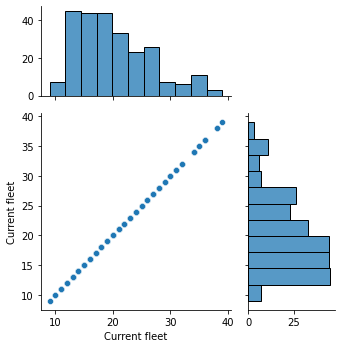

In [9]:
# Load the data
sns_plot = sns.jointplot(df.columns[0], df.columns[0], data=df, height=5, ratio=2, marginal_ticks=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


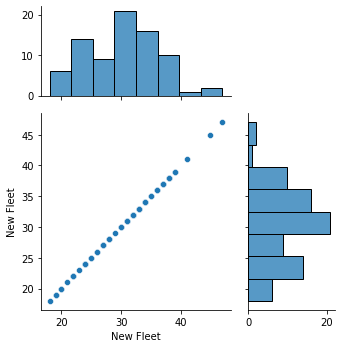

In [10]:
sns_plot = sns.jointplot(df.columns[1], df.columns[1], data=df, height=5, ratio=2, marginal_ticks=True)

## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [19]:
# <---INSERT YOUR CODE HERE--->
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
data_current = df[df.columns[0]].values
data_new = df[df.columns[1]].values
data_new = data_new[np.logical_not(np.isnan(data_new))]
print('Mean of current fleet =',np.mean(data_current))
print('Mean of new fleet =',np.mean(data_new))

Mean of current fleet = 20.14457831325301
Mean of new fleet = 30.481012658227847


In [20]:
current, lower, upper = bootstrap_mean_ci(data_current,len(data_current),10000,92)
print('Mean of current fleet with 92% between',lower,'and',upper)

Mean of current fleet with 92% between 19.453815261044177 and 20.879518072289155


In [23]:
current, lower, upper = bootstrap_standeviation_ci(data_current,len(data_current),10000,73)
print('Stdv of current fleet with 73% between',lower,'and',upper)

Stdv of current fleet with 73% between 6.0613364066373885 and 6.702759618036629


In [21]:
current, lower, upper = bootstrap_mean_ci(data_new,len(data_new),10000,95)
print('Mean of new fleet with 95% between',lower,'and',upper)

Mean of new fleet with 95% between 29.139240506329113 and 31.823101265822782


In [22]:
current, lower, upper = bootstrap_standeviation_ci(data_new,len(data_new),10000,73)
print('Stdv of new fleet with 95% between',lower,'and',upper)

Stdv of new fleet with 95% between 5.508892026775839 and 6.5017608185339375


In [24]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def p_value(data_old, data_new,round_permutation):
  old_mean = np.mean(data_old)
  new_mean = np.mean(data_new)
  cutoff_mean = new_mean-old_mean
  all_data = np.concatenate((data_old,data_new))
  count = 0
  for i in range(round_permutation):
    permu = np.random.permutation(all_data)
    p_old = permu[:len(data_old)]
    p_new = permu[len(data_old):]
    mean_p_old = np.mean(p_old)
    mean_p_new = np.mean(p_new)
    mean_permu = mean_p_new - mean_p_old
    if mean_permu > cutoff_mean:
      count += 1
  return (count/round_permutation)

In [25]:
p_values = p_value(data_current,data_new,30000)
print(p_values)

0.0


In [26]:
#voting data
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]

In [27]:
print('vote PA',len(dem_share_PA))
print('vote OH',len(dem_share_OH))

vote PA 67
vote OH 88


In [28]:
current, lower, upper = bootstrap_mean_ci(dem_share_PA,len(dem_share_PA),10000,98)
print('Mean of voting PA with 98% between',lower,'and',upper)

Mean of voting PA with 98% between 42.752537313432846 and 48.384346268656714


In [29]:
current, lower, upper = bootstrap_mean_ci(dem_share_OH,len(dem_share_OH),10000,98)
print('Mean of voting OH with 98% between',lower,'and',upper)

Mean of voting OH with 98% between 41.81652386363637 and 46.7580875


In [30]:
p_values = p_value(dem_share_PA,dem_share_OH,30000)
print('P_value =', p_values)

P_value = 0.7696333333333333
